# Model Improvement Techniques
This notebook covers key topics to improve deep learning models: cross-validation, ensemble methods, transfer learning, and XAI (explainable AI). All examples are simple and CPU-friendly.

## 1. Cross-Validation
We'll use k-fold cross-validation with a basic classifier to demonstrate how to validate model performance.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_iris()
X, y = data.data, data.target

model = RandomForestClassifier(n_estimators=50)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)

print("Cross-validation scores:", scores)
print("Average score:", np.mean(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Average score: 0.9533333333333335


## 2. Ensemble Methods
We'll create a simple ensemble using voting from multiple models.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=200)
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = SVC(probability=True)

ensemble = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('svc', clf3)
], voting='soft')

ensemble.fit(X, y)
print("Ensemble accuracy:", ensemble.score(X, y))

Ensemble accuracy: 0.9933333333333333


## 3. Transfer Learning
We’ll use a pretrained ResNet18 from torchvision and fine-tune it.

In [3]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import FakeData
from torch.utils.data import DataLoader

device = torch.device('cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224))])
dataset = FakeData(size=100, image_size=(3, 224, 224), num_classes=2, transform=transform)
dataloader = DataLoader(dataset, batch_size=8)

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model = model.to(device)
model.train()
for images, labels in dataloader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Transfer learning example complete.")

/home/pascal/Desktop/Projects/env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pascal/Desktop/Projects/env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Transfer learning example complete.


## 4. Explainable AI (XAI)
We use SHAP to explain a simple model’s predictions.

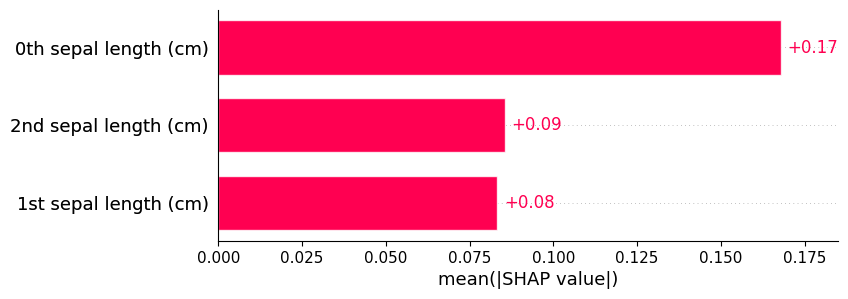

In [7]:
import shap
import matplotlib.pyplot as plt

clf2.fit(X, y)

explainer = shap.TreeExplainer(clf2)
shap_values = explainer.shap_values(X[:5])

shap_exp = shap.Explanation(
    values=shap_values[1],  
    base_values=explainer.expected_value[1],
    data=X[:5],
    feature_names=data.feature_names
)

shap.plots.bar(shap_exp)
